# Gensim 패키지
- Python으로 작성된 오픈 소스 라이브러리로, 자연어 처리와 관련된 다양한 기능을 제공한다.
- 주요 기능
    - **Word Embeddings**
        - word2vec, fastext, doc2vec 등 다양한 word embedding 모델을 제공
    - **토픽 모델링 (Topic Modeling)**
        - LDA등 문장의 주제를 파악하는 모델 제공
    - **텍스트/word 유사도 계산**
    - **문서 군집화**
        - 비슷한 주제의 문서들을 군집화.
    - 다양한 dataset과 pretrained model 제공
        - https://github.com/piskvorky/gensim-data
- https://radimrehurek.com/gensim/

## 설치
- `pip install gensim`
- 4.3.2 버전 기준 scipy 를 1.12 버전을 설치 해야 한다. (1.13 설치시 에러발생)
    - `pip install scipy==1.12`

In [1]:
import gensim

# Word2Vec 학습

- gensim.models.Word2Vec
- 주요 파라미터
    - sentences
        -  학습에 사용할 문장의 리스트. 각 문장의 단어들을 리스트는다. 문장들을 리스트로 묶어 입력한다.
        - 예시: \[\['word1', 'word2', 'word3'], \['word4', 'word5']]
    - vector_size
        -  embedding vector 크기. 기본값: 100
    - window
        -  context window 크기. 중심단어를 기준으로 좌우 몇개의 단어를 확인하는지 크기. 기본값: 5
    - min_count
        - 이 설정보다 낮은 빈도로 등장하는 단어는 무시한다. 데이터 노이즈를 줄이는데 도움이된다. 기본값: 5
    - sg
        - 모델 아키텍처 결정.
        - `0`: CBOW, `1`: Skip-gram. 기본값: 0
    - epochs
        - epochs 수 설정. 기본값: 5
    - alpha
        - initial leaning rate. 기본값: 0.025
    - min_alpha
        - 최소 learning rate. 기본값: 0.0001
        - epoch 마다 learning rate를 alpha 에서 min_alpha 까지 선형적으로 줄여나간다.
    - workers
        -  사용 Thread 수. 기본값: 3

## 학습(Train)
1. Word2Vec 의 initializer에 sentences를 넣어 한번에 학습한다.
2. Word2Vec 클래스에 학습 설정을 하고 `train()` 메소드를 이용해 학습한다.
    - epoch 단위로 작업을 할 경우 사용

In [2]:
# 샘플 텍스트 데이터
sentences = [
    "Natural language processing is an exciting field of study",
    "Word embeddings are a type of word representation",
    "Gensim is a powerful library for text processing",
    "Word2Vec creates vector representations of words", 
    "Gensim runs on Linux, Windows and OS X, as well as any other platform that supports Python and NumPy."
    "All Gensim source code is hosted on Github under the GNU LGPL license, maintained by its open source community.",
    "For commercial arrangements, see Business Support.",
    "Gensim can process arbitrarily large corpora, using data-streamed algorithms.",
    "There are no \"dataset must fit in RAM\" limitations."
]

In [3]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import os

In [5]:
# 토큰화 -> 각 문서들을 토큰단위로 나누기.
### 문장을 소문자로 변경후 token 화.
tokenized_sentences = [word_tokenize(sentence.lower())  for sentence in sentences]
tokenized_sentences

[['natural',
  'language',
  'processing',
  'is',
  'an',
  'exciting',
  'field',
  'of',
  'study'],
 ['word', 'embeddings', 'are', 'a', 'type', 'of', 'word', 'representation'],
 ['gensim', 'is', 'a', 'powerful', 'library', 'for', 'text', 'processing'],
 ['word2vec', 'creates', 'vector', 'representations', 'of', 'words'],
 ['gensim',
  'runs',
  'on',
  'linux',
  ',',
  'windows',
  'and',
  'os',
  'x',
  ',',
  'as',
  'well',
  'as',
  'any',
  'other',
  'platform',
  'that',
  'supports',
  'python',
  'and',
  'numpy.all',
  'gensim',
  'source',
  'code',
  'is',
  'hosted',
  'on',
  'github',
  'under',
  'the',
  'gnu',
  'lgpl',
  'license',
  ',',
  'maintained',
  'by',
  'its',
  'open',
  'source',
  'community',
  '.'],
 ['for', 'commercial', 'arrangements', ',', 'see', 'business', 'support', '.'],
 ['gensim',
  'can',
  'process',
  'arbitrarily',
  'large',
  'corpora',
  ',',
  'using',
  'data-streamed',
  'algorithms',
  '.'],
 ['there',
  'are',
  'no',
  '``'

In [7]:
# 1 방식 학습 - Word2Vec 객체 생성하면서 학습.
model1 = Word2Vec(
    sentences=tokenized_sentences, # 학습 데이터셋.
    vector_size=10,                    # embedding vector의 차원수. (한단어를 몇개의 숫자(feature)로 표현)
    window=2,                   # 주변단어 개수. (중심단어 기준으로 좌우 2개씩) 
    min_count=1,                      # 최소 출연 빈도수. (지정한 빈도수 이상 출현 단어만 학습.)
    epochs=10, 
    workers=os.cpu_count()
)

In [8]:
print(type(model1))

<class 'gensim.models.word2vec.Word2Vec'>


In [9]:
# 2 방식 
### 학습 관련 설정을 넣고 객체를 생성.
model2 = Word2Vec(vector_size=10, window=2, min_count=1, workers=os.cpu_count())
### 어휘사전 생성 (학습전 생성)
model2.build_vocab(tokenized_sentences)
### 학습
epochs = 10
for epoch in range(epochs):
    # 1 에폭씩 이어서 학습하는 형식. (epochs=1)
    model2.train(
        tokenized_sentences,                         # 학습데이터셋
        total_examples=model2.corpus_count,   # 문서 개수. len(tokenized_sentences)
        epochs=1, 
        compute_loss=True, # loss계산
    )
    #  1 에폭 종료
    loss = model2.get_latest_training_loss() # compute_loss=True 하면 학습시 loss를 계산해서 조회할 수있다.
    print(f"{epoch+1}에폭의 Loss는 {loss} ")

1에폭의 Loss는 152.68646240234375 
2에폭의 Loss는 178.3299560546875 
3에폭의 Loss는 151.45265197753906 
4에폭의 Loss는 146.4004364013672 
5에폭의 Loss는 163.38648986816406 
6에폭의 Loss는 142.96566772460938 
7에폭의 Loss는 163.5022430419922 
8에폭의 Loss는 203.60801696777344 
9에폭의 Loss는 173.37515258789062 
10에폭의 Loss는 142.07772827148438 


## 학습 후 결과 조회

- **Word embedding vector**
    - model.wv (KeyedVectors type 객체) 속성 이용
- **단어 목록 조회**
    - modle.wv.index_to_key, modle.wv..key_to_index
- **단어 벡터 조회**
    - modle.wv[word]: 특정 단어의 vector반환
- **단어 존재 여부 확인**
    - modle.wv.\_\_contains\_\_(word)
- **유사단어들 찾기**
    - modle.wv.most_similar(word)
- **단어간 유사도 비교**
    - model.wv.similarity(word1, word2)

In [11]:
model1.wv

In [13]:
model1.wv.index_to_key  # index->word

[',',
 'gensim',
 '.',
 'is',
 'of',
 'source',
 'on',
 'as',
 'word',
 'for',
 'a',
 'processing',
 'and',
 'are',
 'runs',
 'windows',
 'linux',
 'limitations',
 'os',
 'representations',
 'x',
 'well',
 'any',
 'other',
 'words',
 'text',
 'vector',
 'creates',
 'word2vec',
 'that',
 'library',
 'powerful',
 'representation',
 'type',
 'embeddings',
 'study',
 'field',
 'exciting',
 'an',
 'language',
 'platform',
 'supports',
 "''",
 'algorithms',
 'can',
 'process',
 'arbitrarily',
 'large',
 'corpora',
 'using',
 'data-streamed',
 'there',
 'python',
 'no',
 '``',
 'dataset',
 'must',
 'fit',
 'in',
 'ram',
 'support',
 'business',
 'see',
 'arrangements',
 'numpy.all',
 'code',
 'hosted',
 'github',
 'under',
 'the',
 'gnu',
 'lgpl',
 'license',
 'maintained',
 'by',
 'its',
 'open',
 'community',
 'commercial',
 'natural']

In [14]:
model1.wv.key_to_index # word -> index

{',': 0,
 'gensim': 1,
 '.': 2,
 'is': 3,
 'of': 4,
 'source': 5,
 'on': 6,
 'as': 7,
 'word': 8,
 'for': 9,
 'a': 10,
 'processing': 11,
 'and': 12,
 'are': 13,
 'runs': 14,
 'windows': 15,
 'linux': 16,
 'limitations': 17,
 'os': 18,
 'representations': 19,
 'x': 20,
 'well': 21,
 'any': 22,
 'other': 23,
 'words': 24,
 'text': 25,
 'vector': 26,
 'creates': 27,
 'word2vec': 28,
 'that': 29,
 'library': 30,
 'powerful': 31,
 'representation': 32,
 'type': 33,
 'embeddings': 34,
 'study': 35,
 'field': 36,
 'exciting': 37,
 'an': 38,
 'language': 39,
 'platform': 40,
 'supports': 41,
 "''": 42,
 'algorithms': 43,
 'can': 44,
 'process': 45,
 'arbitrarily': 46,
 'large': 47,
 'corpora': 48,
 'using': 49,
 'data-streamed': 50,
 'there': 51,
 'python': 52,
 'no': 53,
 '``': 54,
 'dataset': 55,
 'must': 56,
 'fit': 57,
 'in': 58,
 'ram': 59,
 'support': 60,
 'business': 61,
 'see': 62,
 'arrangements': 63,
 'numpy.all': 64,
 'code': 65,
 'hosted': 66,
 'github': 67,
 'under': 68,
 'the': 

In [18]:
# 특정 단어의 embedding vector를 조회
# model1.wv['gensim']
# model1.wv['.']
model1.wv['processing']

array([-0.004125  , -0.08367079, -0.05580894,  0.07098153,  0.03393789,
        0.07218163,  0.06882603,  0.07543215, -0.03854557, -0.00591042],
      dtype=float32)

In [25]:
word = "processing"
if model1.wv.__contains__(word): # 특정 단어가 vocab 에 있는지 여부
    print(model1.wv[word])
else:
    print(word, " 없는 단어")

processinddsdfg  없는 단어


In [26]:
word = "안녕"
try:
    print(model1.wv[word])
except:
    print("없음")

없음


In [27]:
model1.wv.most_similar("processing")  
# processing과 유사도 높은 단어 10개를 반환. (단어, 유사도점수)

[('windows', 0.7187665104866028),
 ('runs', 0.5363553762435913),
 ('support', 0.5095639228820801),
 ("''", 0.5057830214500427),
 ('arbitrarily', 0.4905499517917633),
 ('no', 0.47018420696258545),
 ('type', 0.4633690118789673),
 ('open', 0.4575108289718628),
 ('can', 0.43126335740089417),
 ('words', 0.42621690034866333)]

In [28]:
model1.wv.most_similar("processing", topn=3)  

[('windows', 0.7187665104866028),
 ('runs', 0.5363553762435913),
 ('support', 0.5095639228820801)]

In [30]:
model1.wv.similarity("type", "processing") # 두 단어간의 유사도 계싼.

0.46336892

## 모델 저장 및 로딩

### 모델 저장, 로딩
- `model.save('저장파일 경로')`
- `Word2Vec.load('저장파일 경로')`

In [31]:
os.makedirs('models')

In [33]:
model1.save("models/sample_model.model")

In [34]:
load_model = Word2Vec.load("models/sample_model.model")
load_model.wv.similarity("type", "processing")


0.46336892

### Word Embedding Vector만 저장 및 로드
- `KeyedVectors` 를 이용해 저장한다.
    - `model.wv.save_word2vec_format('저장경로', binary=True|False)`
        - binary=True: binary 파일로 저장한다. 용량이 작은 대신 내용확인이 안된다.
        - binary=False: csv(공백구분자) 형식 text로 저장한다. 내용을 확인할 수있지만 파일용량이 크다.
- `KeyedVectors.load_word2vec_format("저장경로", binary=True|False)`
    - 저장시 binary에 맞춰 읽는다.

In [36]:
# word embedding vector를 text(csv형식) 로 저장.
model1.wv.save_word2vec_format("models/sample_embedding.csv", binary=False )

In [40]:
from gensim.models import KeyedVectors
load_wv = KeyedVectors.load_word2vec_format(
    "models/sample_embedding.csv", binary=False
)
load_wv.similarity('type', 'processing')

0.46336892

In [41]:
# word embedding vector를 binary 로 저장.
model1.wv.save_word2vec_format("models/sample_embedding.bin", binary=True)

In [42]:
load_wv2 = KeyedVectors.load_word2vec_format(
    "models/sample_embedding.bin", binary=True
)
load_wv2.similarity('type', 'processing')

0.46336892

## Pretrained 모델 사용하기
- https://github.com/Kyubyong/wordvectors

In [43]:
from zipfile import ZipFile
with ZipFile('pretrained_models/ko_3.zip') as zf:
    zf.extractall('models/ko')

In [ ]:
# ko.csv : Embedding Vector를 text 형식으로 저장한 파일
# ko.model(ko.bin) : Word2Vect 모델 자체를 저장한 파일.

In [45]:
# ko_model = Word2Vec.load("models/ko/ko.model")
ko_wv = KeyedVectors.load_word2vec_format("models/ko/ko.csv")

In [46]:
print(ko_wv)

KeyedVectors<vector_size=200, 30185 keys>


In [48]:
ko_wv.index_to_key[:20]

['하',
 '이',
 'ㄴ',
 '의',
 '는',
 '다',
 '에',
 '을',
 '었',
 '은',
 '되',
 '를',
 '어',
 '고',
 '있',
 '가',
 '아',
 '으로',
 '로',
 '에서']

In [51]:
word = input("Word:")
try:
    e_vector = ko_wv[word]
    print(e_vector.shape)
    print(ko_wv.most_similar(word, topn=5))
except:
    print(f'{word} 는 없는 key입니다.')

Word: 지진


(200,)
[('해일', 0.7344229817390442), ('쓰나미', 0.6988375186920166), ('대지진', 0.6768258810043335), ('산불', 0.6437767148017883), ('돌풍', 0.6082443594932556)]


# 빅카인즈 뉴스 데이터를 이용한 Word2Vec 학습
- 빅카인즈
    - 한국언론진흥재단에서 운영하는 뉴스빅데이터 분석 서비스 사이트
- 빅카인즈에서 특정 분야의 기사들을 수집해서 학습시킨다.
    - https://www.bigkinds.or.kr/
    - 회원가입 (구글, 네이버, 카카오 계정으로 가입 가능)
    - 뉴스검색 > 뉴스검색$\cdot$분석 클릭    
      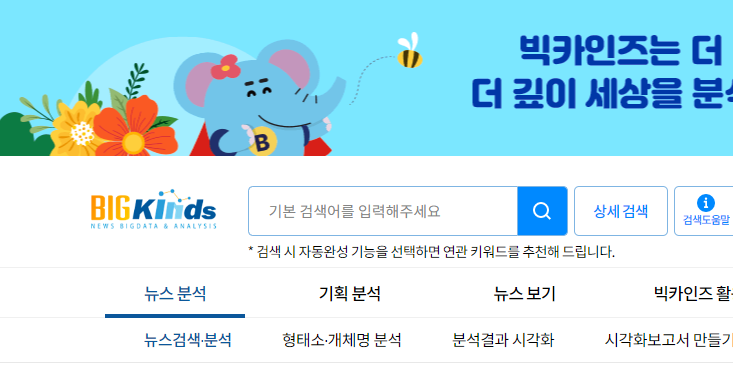
      
    - 기간, 언론사, 분류, 상세검색 등 검색 조건입력 후 조회             
      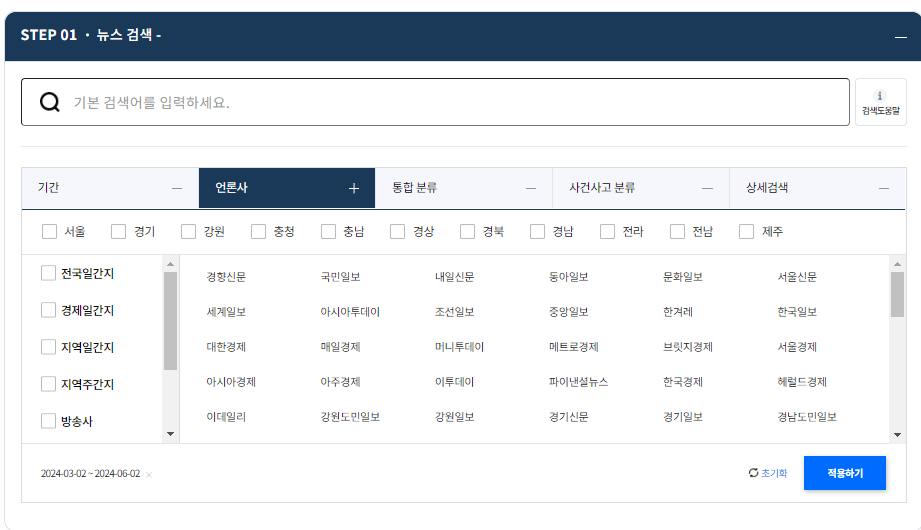
      
    - 결과 다운로드
        - step3 분석결과및 시각화 -> 맨 아래 `엑셀다운로드` 클릭              
          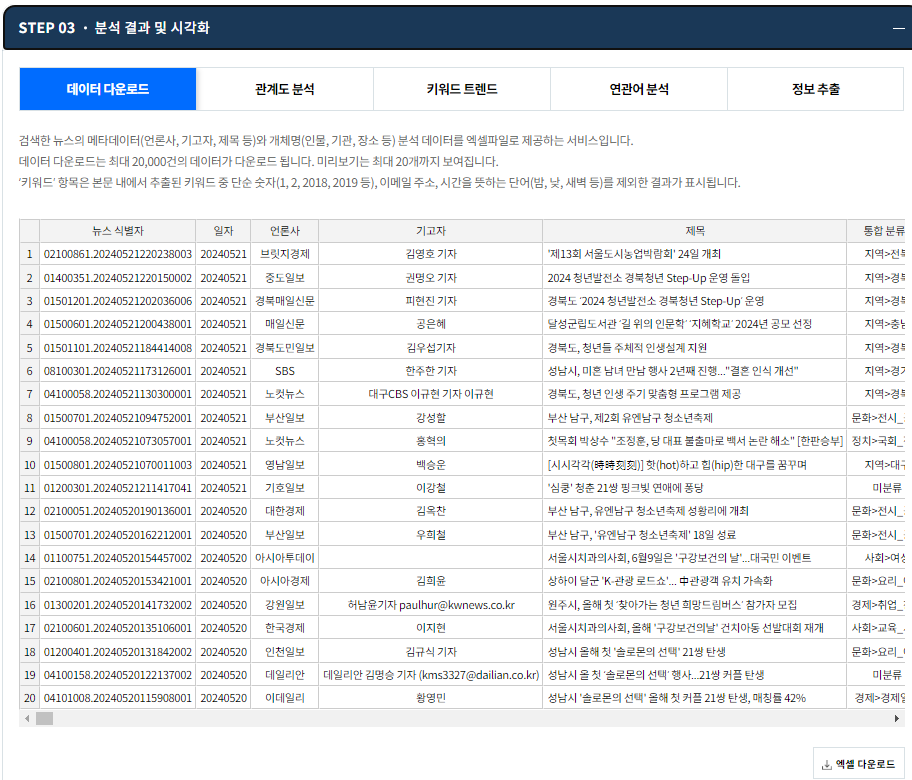

In [53]:
pip install openpyxl

  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   --------- ------------------------------ 61.4/251.3 kB 1.1 MB/s eta 0:00:01
   ----------------------------------- ---- 225.3/251.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 251.3/251.3 kB 2.2 MB/s eta 0:00:00
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

data = pd.read_excel("datasets/NewsResult_20240303-20240603.xlsx")

C:\Classes\DA-35\10_nlp_deeplearning\env\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10418 entries, 0 to 10417
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             10418 non-null  float64
 1   일자                 10418 non-null  int64  
 2   언론사                10418 non-null  object 
 3   기고자                9916 non-null   object 
 4   제목                 10418 non-null  object 
 5   통합 분류1             10418 non-null  object 
 6   통합 분류2             8998 non-null   object 
 7   통합 분류3             7949 non-null   object 
 8   사건/사고 분류1          10418 non-null  object 
 9   사건/사고 분류2          3382 non-null   object 
 10  사건/사고 분류3          1148 non-null   object 
 11  인물                 5423 non-null   object 
 12  위치                 10048 non-null  object 
 13  기관                 10193 non-null  object 
 14  키워드                10418 non-null  object 
 15  특성추출(가중치순 상위 50개)  10418 non-null  object 
 16  본문                 104

In [56]:
data.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.400551e+06,20240603,충북일보,천영준,'지속가능한 환경 충북의 길' 포럼 지정토론,사회>환경,경제>자원,NaN,범죄>기업범죄>거래제한,재해>자연재해>가뭄,재해>자연재해>홍수,"정세웅,현윤정,김대호","세지,충북,충북도,선진,충북지역본부","충북대학교,한국환경연구원,충북,정부,OECD,통합물,충북도,자원,수자원,한국수자원공...","지속가능,환경,충북,포럼,지정,토론,좌장,정세웅,충북대학교,환경,공학,교수,지하수,...","지하수,지표수,수자원,충북,지속가능,지자체,기후위기","◇좌장 정세웅 충북대학교 환경공학과 교수 \n \n\n""지하수는 유한한 자원이 아니...",https://www.inews365.com/news/article.html?no=...,NaN
1,4.101808e+06,20240603,비즈워치,김희정,"북 '오물풍선' 피해, 시민안전보험 안돼 ""개인보험으로 해결""",경제>금융_재테크,사회>노동_복지,국제>유럽_EU,사고>산업사고>폭발,사고>산업사고>화재,재해>자연재해>지진,NaN,"북,경기,안산시,상해,단원구,북한,서울시,마저도","정부,생명보험,보험,민방위기본법,경찰,북한","오물,피해,시민,안전,보험,개인,보험,해결,차보험금,무과실,보험료,할증,피해,실손,...","상해,지자체,보험사,오물풍선,보험료,기본법,시민안전보험,보험업계,무과실,재산상,보험...",북한이 살포한 오물풍선에 맞아 다치거나 자동차 파손 등 재산상 손해를 봐도 이를 보...,http://news.bizwatch.co.kr/article/finance/202...,NaN
2,1.100611e+06,20240603,서울신문,류지영\n류지영 기자,아이슬란드 28년 만 여성대통령 당선 기업인 출신 할라 토마스도티르,정치>청와대,국제>국제일반,정치>선거,재해>자연재해>화산폭발,NaN,NaN,"흐룬트,로가도티르,리처드 브랜슨","최고경영자,남서,유럽,아이슬란드","상공회의소,AP통신,오두르 캐피털,야콥스,영국,아이슬란드,비그디스 핀보가도티르","아이슬란드,여성,대통령,당선,기업인,출신,토마스도티르,아이슬란드,대선,여성,후보,토...","아이슬란드,토마스도티르,득표율,비그디스,법률안,로가도티르,흐룬트,최고경영자,경영자,...",아이슬란드 대선에서 여성 후보인 할라 토마스도티르(56)가 승리를 거머쥐면서 역사상...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN
3,1.500601e+06,20240603,매일신문,조규덕,"한국도로공사-보험개발원, ‘긴급대피 알림시스템 구축’ 업무협약 체결",경제>경제일반,IT_과학>모바일,지역>경기,재해>자연재해>태풍,NaN,NaN,설승환,NaN,"보험개발원,한국도로공사","한국도로공사,보험개발원,긴급대피,구축,긴급,대피,업무,협약,체결,긴급,대피,안내,사...","긴급대피,2차,한국도로공사,고속도로,운전자,보험개발원,개발원,가입자,회의실,업무협약...",한국도로공사와 보험개발원은 지난달 31일 보험개발원 회의실에서 고속도로 2차사고 예...,https://www.imaeil.com/page/view/2024060316584...,NaN
4,1.500901e+06,20240603,울산매일,김기곤 기자,"BNK경남은행, 사회공헌사업 투자액 증가율 지방은행 중 1위",지역>울산,경제>산업_기업,지역>충남,재해>자연재해>태풍,NaN,NaN,예경탁,"울산,울산시,광려천,진주시,후쿠시마,수변,경남신보재단,울산농수산물도매시장,마산 어시...","경남은행,NK경남은행,경남신용보증재단,울산신보재단,은행연합회,경남메세나협회,경남은행...","BNK경남은행,사회,공헌,사업,투자액,증가,지방,은행,1위,BNK경남은행,지방은행,...","경남은행,사회공헌사업,bnk경남은행,울산,지방은행,수산물,증가율,bnk,경남,소상공...",BNK경남은행이 지난해 지방은행 가운데 사회공헌사업 투자액 증가율이 가장 높은 것으...,http://www.iusm.co.kr/news/articleView.html?id...,NaN


In [3]:
# 제목, 본문 컬럼만 사용
df = data[['제목', "본문"]].copy()
df.head()

,제목,본문
0,'지속가능한 환경 충북의 길' 포럼 지정토론,"◇좌장 정세웅 충북대학교 환경공학과 교수 \n \n\n""지하수는 유한한 자원이 아니..."
1,"북 '오물풍선' 피해, 시민안전보험 안돼 ""개인보험으로 해결""",북한이 살포한 오물풍선에 맞아 다치거나 자동차 파손 등 재산상 손해를 봐도 이를 보...
2,아이슬란드 28년 만 여성대통령 당선 기업인 출신 할라 토마스도티르,아이슬란드 대선에서 여성 후보인 할라 토마스도티르(56)가 승리를 거머쥐면서 역사상...
3,"한국도로공사-보험개발원, ‘긴급대피 알림시스템 구축’ 업무협약 체결",한국도로공사와 보험개발원은 지난달 31일 보험개발원 회의실에서 고속도로 2차사고 예...
4,"BNK경남은행, 사회공헌사업 투자액 증가율 지방은행 중 1위",BNK경남은행이 지난해 지방은행 가운데 사회공헌사업 투자액 증가율이 가장 높은 것으...


In [4]:
df.tail(10)

,제목,본문
10408,부산지역 다중이용시설 실내 공기질 대부분 '적합',다중이용시설인 부산도시철도 지하역사. 부산시 제공 \n부산지역 다중이용시설의 실내공...
10409,"충남도, 올해 경제림 내화수림대 2558㏊ 조성한다","충남도청 전경. 대전일보DB. 충남도가 올해 경제림, 내화수림대 등을 2558㏊ 규..."
10410,"기상청 ""흑산도 북북서쪽 바다서 규모 2.8 지진""",3일 오전 8시53분39초 전남 신안군 흑산도 북북서쪽 56km 해역에서 규모 2....
10411,[날씨] 꽃샘추위 풀려 봄처럼 포근...미세먼지 전국 '나쁨',[앵커]\n일요일인 오늘은 꽃샘추위가 풀리면서 봄처럼 포근하겠습니다.\n\n하지만 ...
10412,"광양시, 옥곡천 장동교 통행 제한","광양시, 옥곡천 장동교 통행 제한 \n\n전남 광양시가 옥곡천 생태하천복원사업 일환..."
10413,하루 1억 벌어도 개미가 1억도 안 사네 HDC현대EP 한숨 [윤현주의 主食이 주식],백문불여일견(百聞不如一見). 백 번 듣는 것보다 한 번 보는 게 낫다는 말이다. 가...
10414,오늘의 날씨 - 오전 (2024년 03월 03일),"3월 3일 일요일, 아침 날씨입니다. \n \n아침 최저기온은 서울 -1.0도, 인..."
10415,"'인도의 곡물창고' 그들, 트랙터 타고 뉴델리로 향하는 까닭[글로벌리포트]",3년 연속 성장률 7%를 넘는 고속 성장 중인 '인구 대국' 인도가 대규모 농민 시...
10416,'축구장 4만여개 규모' 농작물 망친 경북 그런데 예방책 없다,지난해 경북도의 농작물 피해 면적이 축구장 4만5000개에 육박하는 등 매년 농업재...
10417,오늘 (3일) 꽃샘추위 누그러지고 미세먼지 나빠지고...오늘 메뉴는 삼겹살?,오늘(3일)은 대체로 기온이 2~5도 올라 맹렬했던 꽃샘추위 역시 다소 누그러질 것...


In [58]:
# 결측치 확인
df.isna().sum()

제목    0
본문    0
dtype: int64

In [17]:
re.sub(r"\s+", ' ', "a       b \n\n\nc\t\t\t\taaaa")

'a b c aaaa'

In [18]:
#### 전처리 + token화 함수
import re
from konlpy.tag import Okt

def tokenize_fn(text, tokenizer):
    # [기자, 신문사 이름] -> 제거
    text = re.sub(r"\[.+?\]", ' ', text)    # [글자들....]  패턴을 제거
    # 공백문자(tab, enter, space) 여러개 -> 공백 하나로 변경
    text = re.sub(r"\s+", " ", text )
    
    # 명사, 형용사, 동사 만 사용.
    tokens = [word for word, tag in tokenizer.pos(text) if tag in ["Noun", "Verb", "Adjective"]]
    return tokens

In [19]:
okt = Okt()
# okt.morphs("오늘은 밥을 먹었습니다.")
tokenize_fn("오늘은 맛있는 밥을 많이             먹었습니다.", okt)

['오늘', '맛있는', '밥', '먹었습니다']

In [9]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [13]:
# 제목 + 본문 을 합쳐서 전처리+토큰화
# df.iterrows()  # 행단위로 제공하는 generator 를 반환. (행 index, 컬럼값들을 가지는 Series)
for idx, row in df.iterrows():
    print("idx:",  idx)  # index name
    print("row", row) # 컬럼값들 있는 Series
    break

idx: 0
row 제목                             '지속가능한 환경 충북의 길' 포럼 지정토론
본문    ◇좌장 정세웅 충북대학교 환경공학과 교수 \n \n\n"지하수는 유한한 자원이 아니...
Name: 0, dtype: object


In [20]:
okt = Okt()

token_list = []  #[[문장 토큰들], [문장 토큰들], ....]
for idx, row in df.iterrows():
    txt = f"{row['제목'].strip()} {row['본문'].strip()}" # 제목  + 본문
    token_list.append(tokenize_fn(txt, okt))

In [23]:
df.shape

(10418, 2)

In [24]:
print(len(token_list))
token_list[:2]

10418


[['지속',
  '가능한',
  '환경',
  '충북',
  '길',
  '포럼',
  '지정',
  '토론',
  '좌',
  '정세',
  '웅',
  '충북대학교',
  '환경공학',
  '교수',
  '지하수',
  '유한',
  '자원',
  '아니다',
  '쓰고',
  '나면',
  '없어지는',
  '것',
  '아니기',
  '때문',
  '적절한',
  '시기',
  '적절한',
  '공간',
  '효율',
  '이용',
  '해야',
  '한다',
  '전',
  '세계',
  '보면',
  '식수',
  '절반',
  '지하수',
  '그런',
  '만큼',
  '지하수',
  '효율',
  '개발',
  '이용',
  '보존',
  '관리',
  '대해',
  '전문가',
  '명의',
  '의견',
  '들어',
  '보는',
  '시간',
  '마련',
  '했다',
  '김종식',
  '충북도',
  '수'],
 ['북',
  '물풍선',
  '피해',
  '시민',
  '안전',
  '보험',
  '돼',
  '개인',
  '보험',
  '해결',
  '북한',
  '살포',
  '물풍선',
  '맞아',
  '다치거나',
  '자동차',
  '파손',
  '등',
  '재산',
  '손해',
  '봐도',
  '이를',
  '보상',
  '할',
  '제도',
  '장치',
  '미비한',
  '것',
  '나타났다',
  '정부',
  '차원',
  '보상',
  '받기',
  '쉽지',
  '않다는',
  '얘기',
  '민간',
  '보험',
  '가능하지만',
  '향후',
  '보험료',
  '할증',
  '등',
  '일부',
  '불이익',
  '감수',
  '해야',
  '한다',
  '보험',
  '업계',
  '따르면',
  '서울시',
  '비롯',
  '각',
  '지자체',
  '재난',
  '피해',
  '시민',
  '지원',
  '하기',
  '위',
  '공적',
  '보험',
  '시민']]

In [37]:
# Word2Vec 모델 학습 
from gensim.models import Word2Vec, KeyedVectors
import os

save_path = "models/news_w2v.model"
epochs = 100
best_loss = float('inf')   #파이썬에서 무한값 정의
loss_list = []  # epoch별 loss저장.
# 모델 생성
model = Word2Vec(
    vector_size=100, # embedding vector size
    window=5, 
    sg=1, # skip-gram, 0: cbow
    workers=os.cpu_count()
)
# 어휘사전 생성
model.build_vocab(token_list)
# train
for epoch in range(epochs):
    model.train(
        token_list, #학습 데이터
        total_examples=model.corpus_count, # 학습데이터의 문장개수
        epochs=1,
        compute_loss=True # loss를 반환.
    )
    # 1 에폭 학습 후
    ### loss 조회
    loss = model.get_latest_training_loss()
    if best_loss > loss: # 개선이 되면
        model.save(save_path)
        print(f">>>>>>>{epoch+1} 에폭에서 저장.")
        best_loss = loss
    print(f"{epoch+1}, Loss: {loss}")
    loss_list.append(loss)

>>>>>>>1 에폭에서 저장.
1, Loss: 511834.375
>>>>>>>2 에폭에서 저장.
2, Loss: 464692.59375
>>>>>>>3 에폭에서 저장.
3, Loss: 446536.6875
>>>>>>>4 에폭에서 저장.
4, Loss: 423759.6875
>>>>>>>5 에폭에서 저장.
5, Loss: 420351.78125
>>>>>>>6 에폭에서 저장.
6, Loss: 405442.0625
7, Loss: 407208.09375
>>>>>>>8 에폭에서 저장.
8, Loss: 394555.71875
9, Loss: 408592.71875
>>>>>>>10 에폭에서 저장.
10, Loss: 388860.25
>>>>>>>11 에폭에서 저장.
11, Loss: 386584.34375
>>>>>>>12 에폭에서 저장.
12, Loss: 372077.375
13, Loss: 385155.46875
14, Loss: 390667.875
15, Loss: 395112.65625
16, Loss: 374710.21875
17, Loss: 393743.59375
>>>>>>>18 에폭에서 저장.
18, Loss: 369918.21875
19, Loss: 387298.375
20, Loss: 372751.28125
21, Loss: 372591.1875
>>>>>>>22 에폭에서 저장.
22, Loss: 368938.65625
>>>>>>>23 에폭에서 저장.
23, Loss: 366096.78125
24, Loss: 370292.78125
25, Loss: 371536.625
26, Loss: 371402.0
27, Loss: 371650.65625
28, Loss: 372464.15625
29, Loss: 379062.09375
30, Loss: 367509.3125
>>>>>>>31 에폭에서 저장.
31, Loss: 365478.375
32, Loss: 367319.8125
33, Loss: 368618.78125
34, Loss: 378181

In [27]:
# 저장된 모델 loading
load_model = Word2Vec.load(save_path)

In [28]:
# KeyedVectors
wv = load_model.wv

In [29]:
wv.index_to_key

['등',
 '발생',
 '지진',
 '했다',
 '피해',
 '해',
 '지역',
 '안전',
 '재난',
 '명',
 '하는',
 '규모',
 '있다',
 '것',
 '밝혔다',
 '대비',
 '대만',
 '사업',
 '위해',
 '이',
 '도',
 '따르면',
 '지난',
 '산사태',
 '된',
 '대응',
 '미세먼지',
 '대책',
 '기자',
 '점검',
 '황사',
 '일본',
 '여름철',
 '의',
 '날',
 '폭염',
 '수',
 '및',
 '위',
 '한국',
 '관리',
 '훈련',
 '개',
 '있는',
 '할',
 '이번',
 '비',
 '현지',
 '시설',
 '강진',
 '시',
 '정부',
 '시간',
 '올해',
 '재해',
 '상황',
 '예방',
 '현장',
 '오전',
 '기상청',
 '실시',
 '한다',
 '지난해',
 '홍수',
 '됐다',
 '전',
 '전국',
 '이상',
 '추진',
 '지원',
 '태풍',
 '했다고',
 '운영',
 '제공',
 '하기',
 '주민',
 '기후',
 '경북',
 '서울',
 '보험',
 '곳',
 '세계',
 '는',
 '최근',
 '물',
 '영향',
 '한',
 '를',
 '인한',
 '공사',
 '오늘',
 '사고',
 '기온',
 '중',
 '중국',
 '가',
 '진행',
 '자연',
 '시민',
 '입니다',
 '폭우',
 '가운데',
 '제',
 '환경',
 '집중호우',
 '생산',
 '기관',
 '위기',
 '복구',
 '대상',
 '달',
 '고',
 '위험',
 '있습니다',
 '최대',
 '센터',
 '취약',
 '질환',
 '체계',
 '사진',
 '대한',
 '오후',
 '대피',
 '침수',
 '했습니다',
 '도시',
 '풍수',
 '지구',
 '우려',
 '반도체',
 '되는',
 '미국',
 '로',
 '시작',
 '최소',
 '더',
 '보도',
 '남부',
 '가장',
 '된다',
 '되고',
 '관련',
 '경보',
 '농도',
 '산

In [33]:
# 유사도 체크
word = "지진"
word = "미세먼지"
word = "태풍"
word = "방사능"
try:
    print(wv.most_similar(word, topn=5))
except:
    print(f"{word}는  학습된 단어가 아닙니다.")

방사능는  학습된 단어가 아닙니다.


In [35]:
wv["지진"].shape

(100,)